“I certify that this submission is my original work and meets the Faculty's
Expectations of Originality”


Donya Razinejad, Winter 2023

In [1]:
import pandas as pd
import numpy as np

We need to import the data and gain a general overview of Data.

In [2]:
df= pd.read_csv('Data_affected area_modified.csv',index_col='area')

In [3]:
df.head()

X    Y month  day     A     B      C    D  temp    RH  wind  rain
area                                                                   
0.0   7  5.0   mar  fri  86.2  26.2   94.3  5.1   8.2  51.0   6.7   0.0
0.0   7  4.0   oct  tue  90.6  35.4  669.1  6.7  18.0  33.0   0.9   0.0
0.0   7  4.0   oct  sat  90.6  43.7  686.9  6.7  14.6  33.0   1.3   0.0
0.0   8  6.0   mar  fri  91.7  33.3   77.5  9.0   8.3  97.0   4.0   0.2
0.0   8  6.0   mar  sun  89.3  51.3  102.2  9.6  11.4  99.0   1.8   0.0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 517 entries, 0.0 to 0.0
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       515 non-null    float64
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   A       515 non-null    float64
 5   B       517 non-null    float64
 6   C       517 non-null    float64
 7   D       517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      516 non-null    float64
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 52.5+ KB


In [5]:
df.shape

(517, 12)

We need to preprocess our data, addressing null values, incorrect entries, outliers, and data that falls outside the expected range.

In [6]:
df.isnull().sum()

X        0
Y        2
month    0
day      0
A        2
B        0
C        0
D        0
temp     0
RH       1
wind     0
rain     0
dtype: int64

In [7]:
df = df.dropna(subset=['Y'])
df = df.dropna(subset=['A'])

In [8]:

RH1=df['RH']
RH_mean = RH1.mean()
df = df.fillna(RH_mean)


In [9]:
df.isnull().sum()

X        0
Y        0
month    0
day      0
A        0
B        0
C        0
D        0
temp     0
RH       0
wind     0
rain     0
dtype: int64

In [10]:
df = df[(df['Y'] >= 2) & (df['Y'] <= 9)]

In [11]:
df = df[(df['X'] >= 1) & (df['X'] <= 9)]

In [12]:
df["day"] = df["day"].str.lower()
weekdays = ["mon", "tue", "wed", "thu", "fri", "sat", "sun"]
df = df[df["day"].isin(weekdays)]

In [13]:
df["month"] = df["month"].str.lower()
all_months = ["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]
df = df[df["month"].isin(all_months)]

In [14]:
df = df[(df['A'] >= 18.7) & (df['A'] <= 96.20)]

In [15]:
df = df[(df['B'] >= 1.1) & (df['B'] <= 291.3)]

In [16]:
df = df[(df['C'] >= 7.9) & (df['C'] <= 860.6)]

In [17]:
df = df[(df['D'] >= 0.0) & (df['D'] <= 56.10)]

In [18]:
df = df[(df['temp'] >= 2.2) & (df['temp'] <= 33.30)]

In [19]:
df = df[(df['RH'] >= 15.0) & (df['RH'] <= 100)]

In [20]:
df = df[(df['wind'] >= 0.4) & (df['wind'] <= 9.40)]

In [21]:
df = df[(df['rain'] >= 0.0) & (df['rain'] <= 6.4)]

In [22]:
df = df[(df.index >= 0) & (df.index <= 1090.84)]


In [23]:
df['area_boolean'] = df.index.to_series().apply(lambda x: 1 if x > 0 and x <= 1090.84 else 0)

In [24]:
df['is_summer_or_fall'] = df['month'].apply(lambda x: 1 if x.lower() in ["jun", "jul", "aug", "sep","nov","dec"] else 0)

In [25]:
df.to_csv('Cleaned_Data.csv')

Our data has been successfully preprocessed. It's time to identify meaningful correlations within the data.

In [26]:
df= pd.read_csv('Cleaned_Data.csv')

In [27]:
df.head()

area  X    Y month  day     A     B      C    D  temp    RH  wind  rain  \
0   0.0  7  5.0   mar  fri  86.2  26.2   94.3  5.1   8.2  51.0   6.7   0.0   
1   0.0  7  4.0   oct  tue  90.6  35.4  669.1  6.7  18.0  33.0   0.9   0.0   
2   0.0  7  4.0   oct  sat  90.6  43.7  686.9  6.7  14.6  33.0   1.3   0.0   
3   0.0  8  6.0   mar  fri  91.7  33.3   77.5  9.0   8.3  97.0   4.0   0.2   
4   0.0  8  6.0   mar  sun  89.3  51.3  102.2  9.6  11.4  99.0   1.8   0.0   

   area_boolean  is_summer_or_fall  
0             0                  0  
1             0                  0  
2             0                  0  
3             0                  0  
4             0                  0

In [28]:
df.corr(numeric_only=True)

area         X         Y         A         B         C  \
area               1.000000  0.064373  0.046381  0.039732  0.072167  0.050185   
X                  0.064373  1.000000  0.540285 -0.024617 -0.048633 -0.090958   
Y                  0.046381  0.540285  1.000000 -0.037031  0.012474 -0.098968   
A                  0.039732 -0.024617 -0.037031  1.000000  0.379996  0.323384   
B                  0.072167 -0.048633  0.012474  0.379996  1.000000  0.683098   
C                  0.050185 -0.090958 -0.098968  0.323384  0.683098  1.000000   
D                  0.008932  0.001120 -0.024174  0.530371  0.307049  0.221278   
temp               0.097862 -0.052826 -0.022141  0.434124  0.468682  0.497001   
RH                -0.077521  0.081919  0.064713 -0.305687  0.074081 -0.041127   
wind               0.011536  0.019201 -0.018513 -0.037073 -0.108433 -0.205421   
rain              -0.007613  0.066099  0.034002  0.057343  0.074709  0.036454   
area_boolean       0.192102  0.061189  0.061771  0.070540  0.058589  0.097427   
is_summer_or_fall  0.056139 -0.083895 -0.040184  0.302670  0.639714  0.773872   

                          D      temp        RH      wind      rain  \
area               0.008932  0.097862 -0.077521  0.011536 -0.007613   
X                  0.001120 -0.052826  0.081919  0.019201  0.066099   
Y                 -0.024174 -0.022141  0.064713 -0.018513  0.034002   
A                  0.530371  0.434124 -0.305687 -0.037073  0.057343   
B                  0.307049  0.468682  0.074081 -0.108433  0.074709   
C                  0.221278  0.497001 -0.041127 -0.205421  0.036454   
D                  1.000000  0.397100 -0.126587  0.101117  0.069039   
temp               0.397100  1.000000 -0.527084 -0.230108  0.069567   
RH                -0.126587 -0.527084  1.000000  0.075392  0.099832   
wind               0.101117 -0.230108  0.075392  1.000000  0.061433   
rain               0.069039  0.069567  0.099832  0.061433  1.000000   
area_boolean       0.042194  0.076589 -0.048122  0.054705  0.024876   
is_summer_or_fall  0.317591  0.522099 -0.018217 -0.110881  0.033356   

                   area_boolean  is_summer_or_fall  
area                   0.192102           0.056139  
X                      0.061189          -0.083895  
Y                      0.061771          -0.040184  
A                      0.070540           0.302670  
B                      0.058589           0.639714  
C                      0.097427           0.773872  
D                      0.042194           0.317591  
temp                   0.076589           0.522099  
RH                    -0.048122          -0.018217  
wind                   0.054705          -0.110881  
rain                   0.024876           0.033356  
area_boolean           1.000000           0.137628  
is_summer_or_fall      0.137628           1.000000

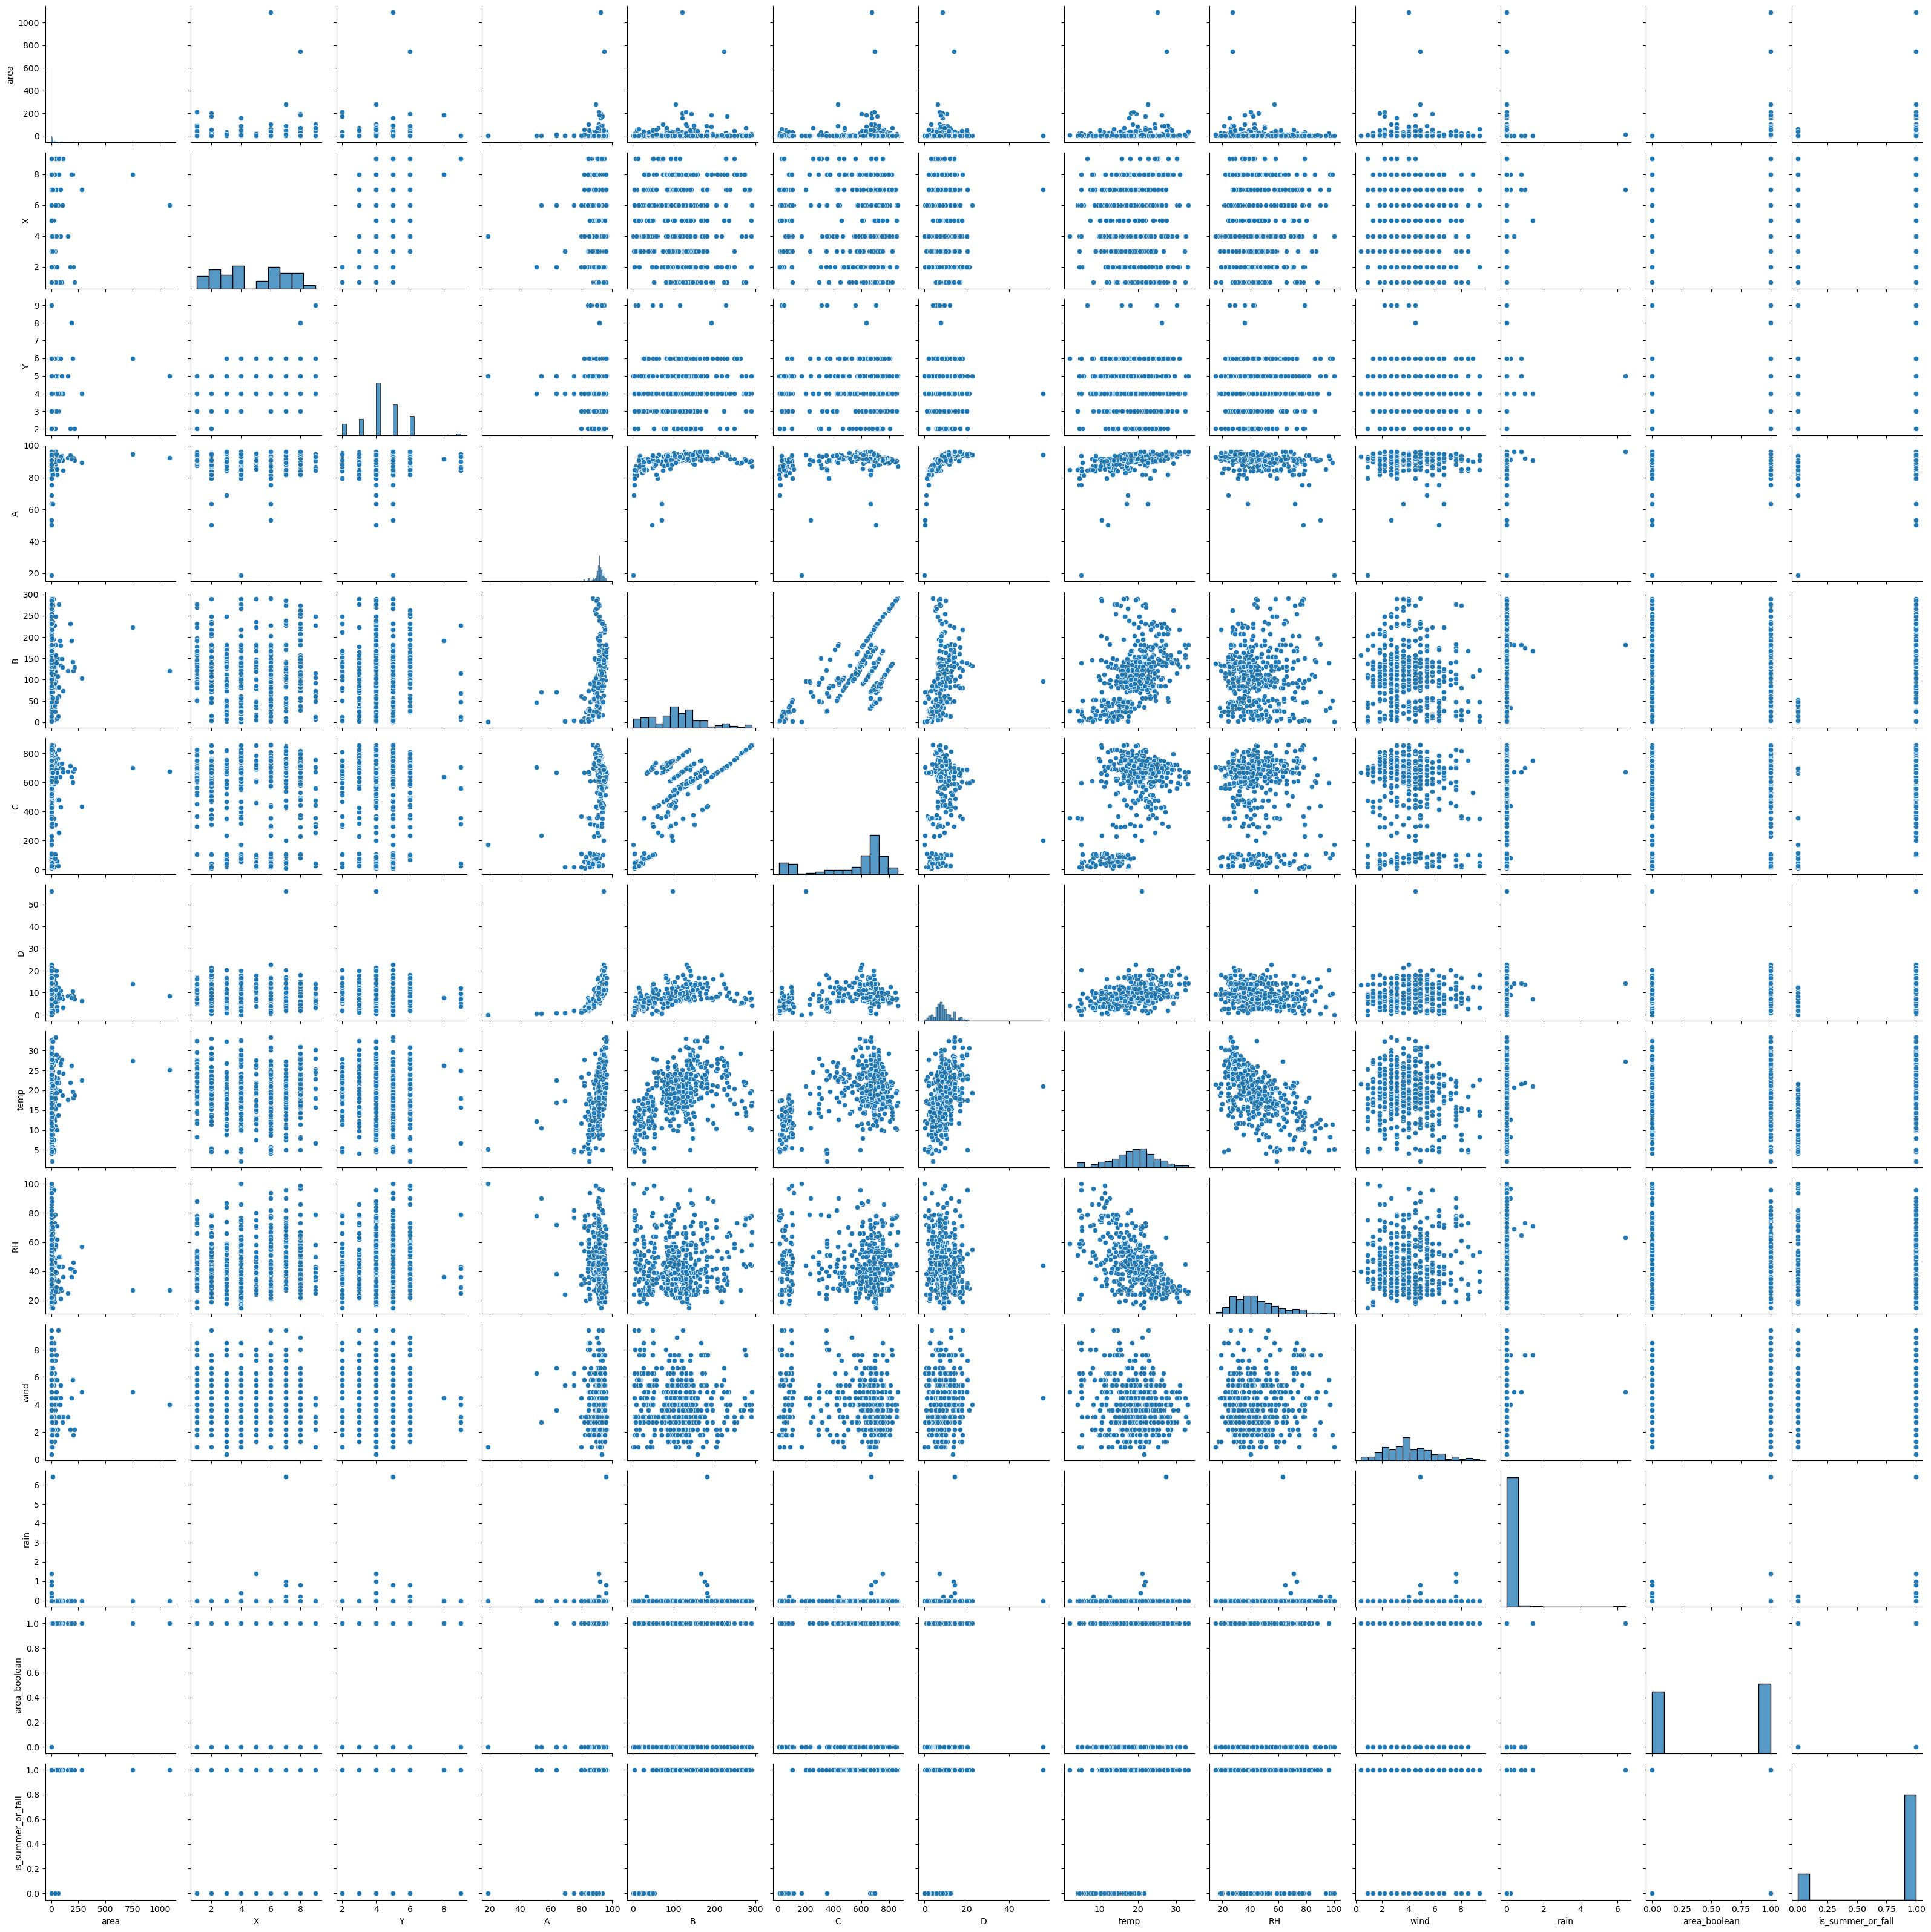

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.show()

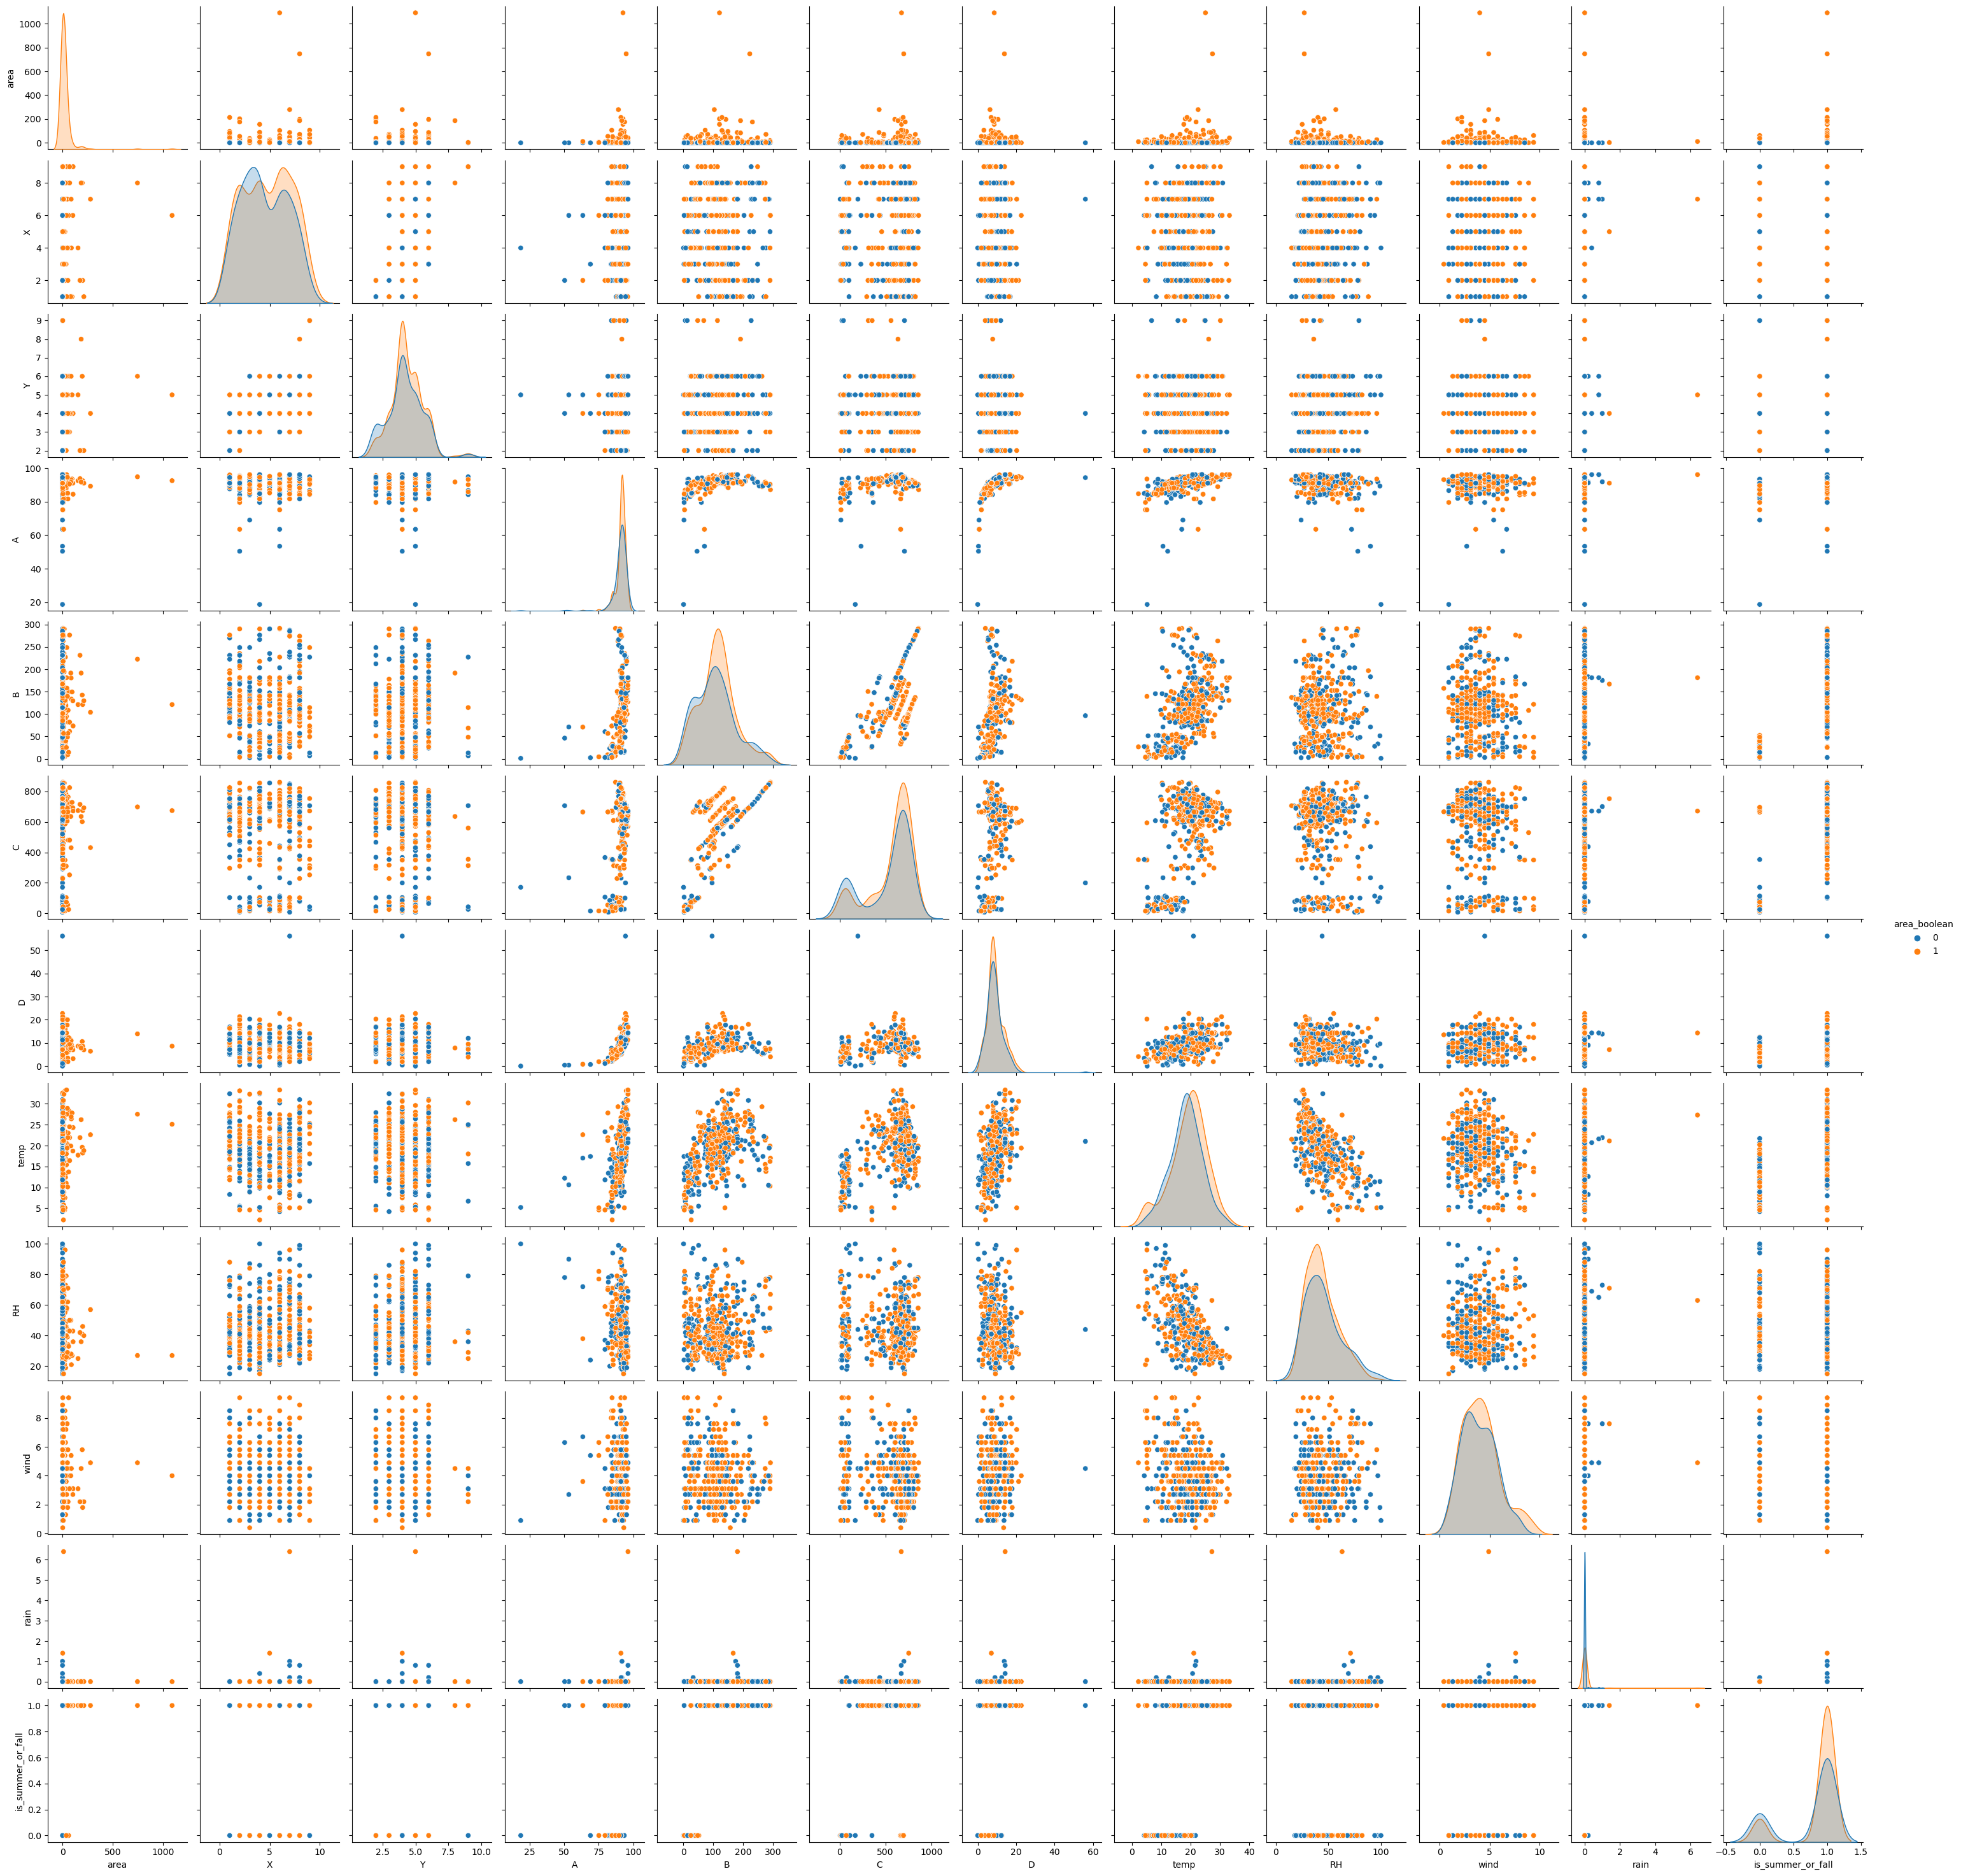

In [30]:
sns.pairplot(df,hue='area_boolean')
plt.show()

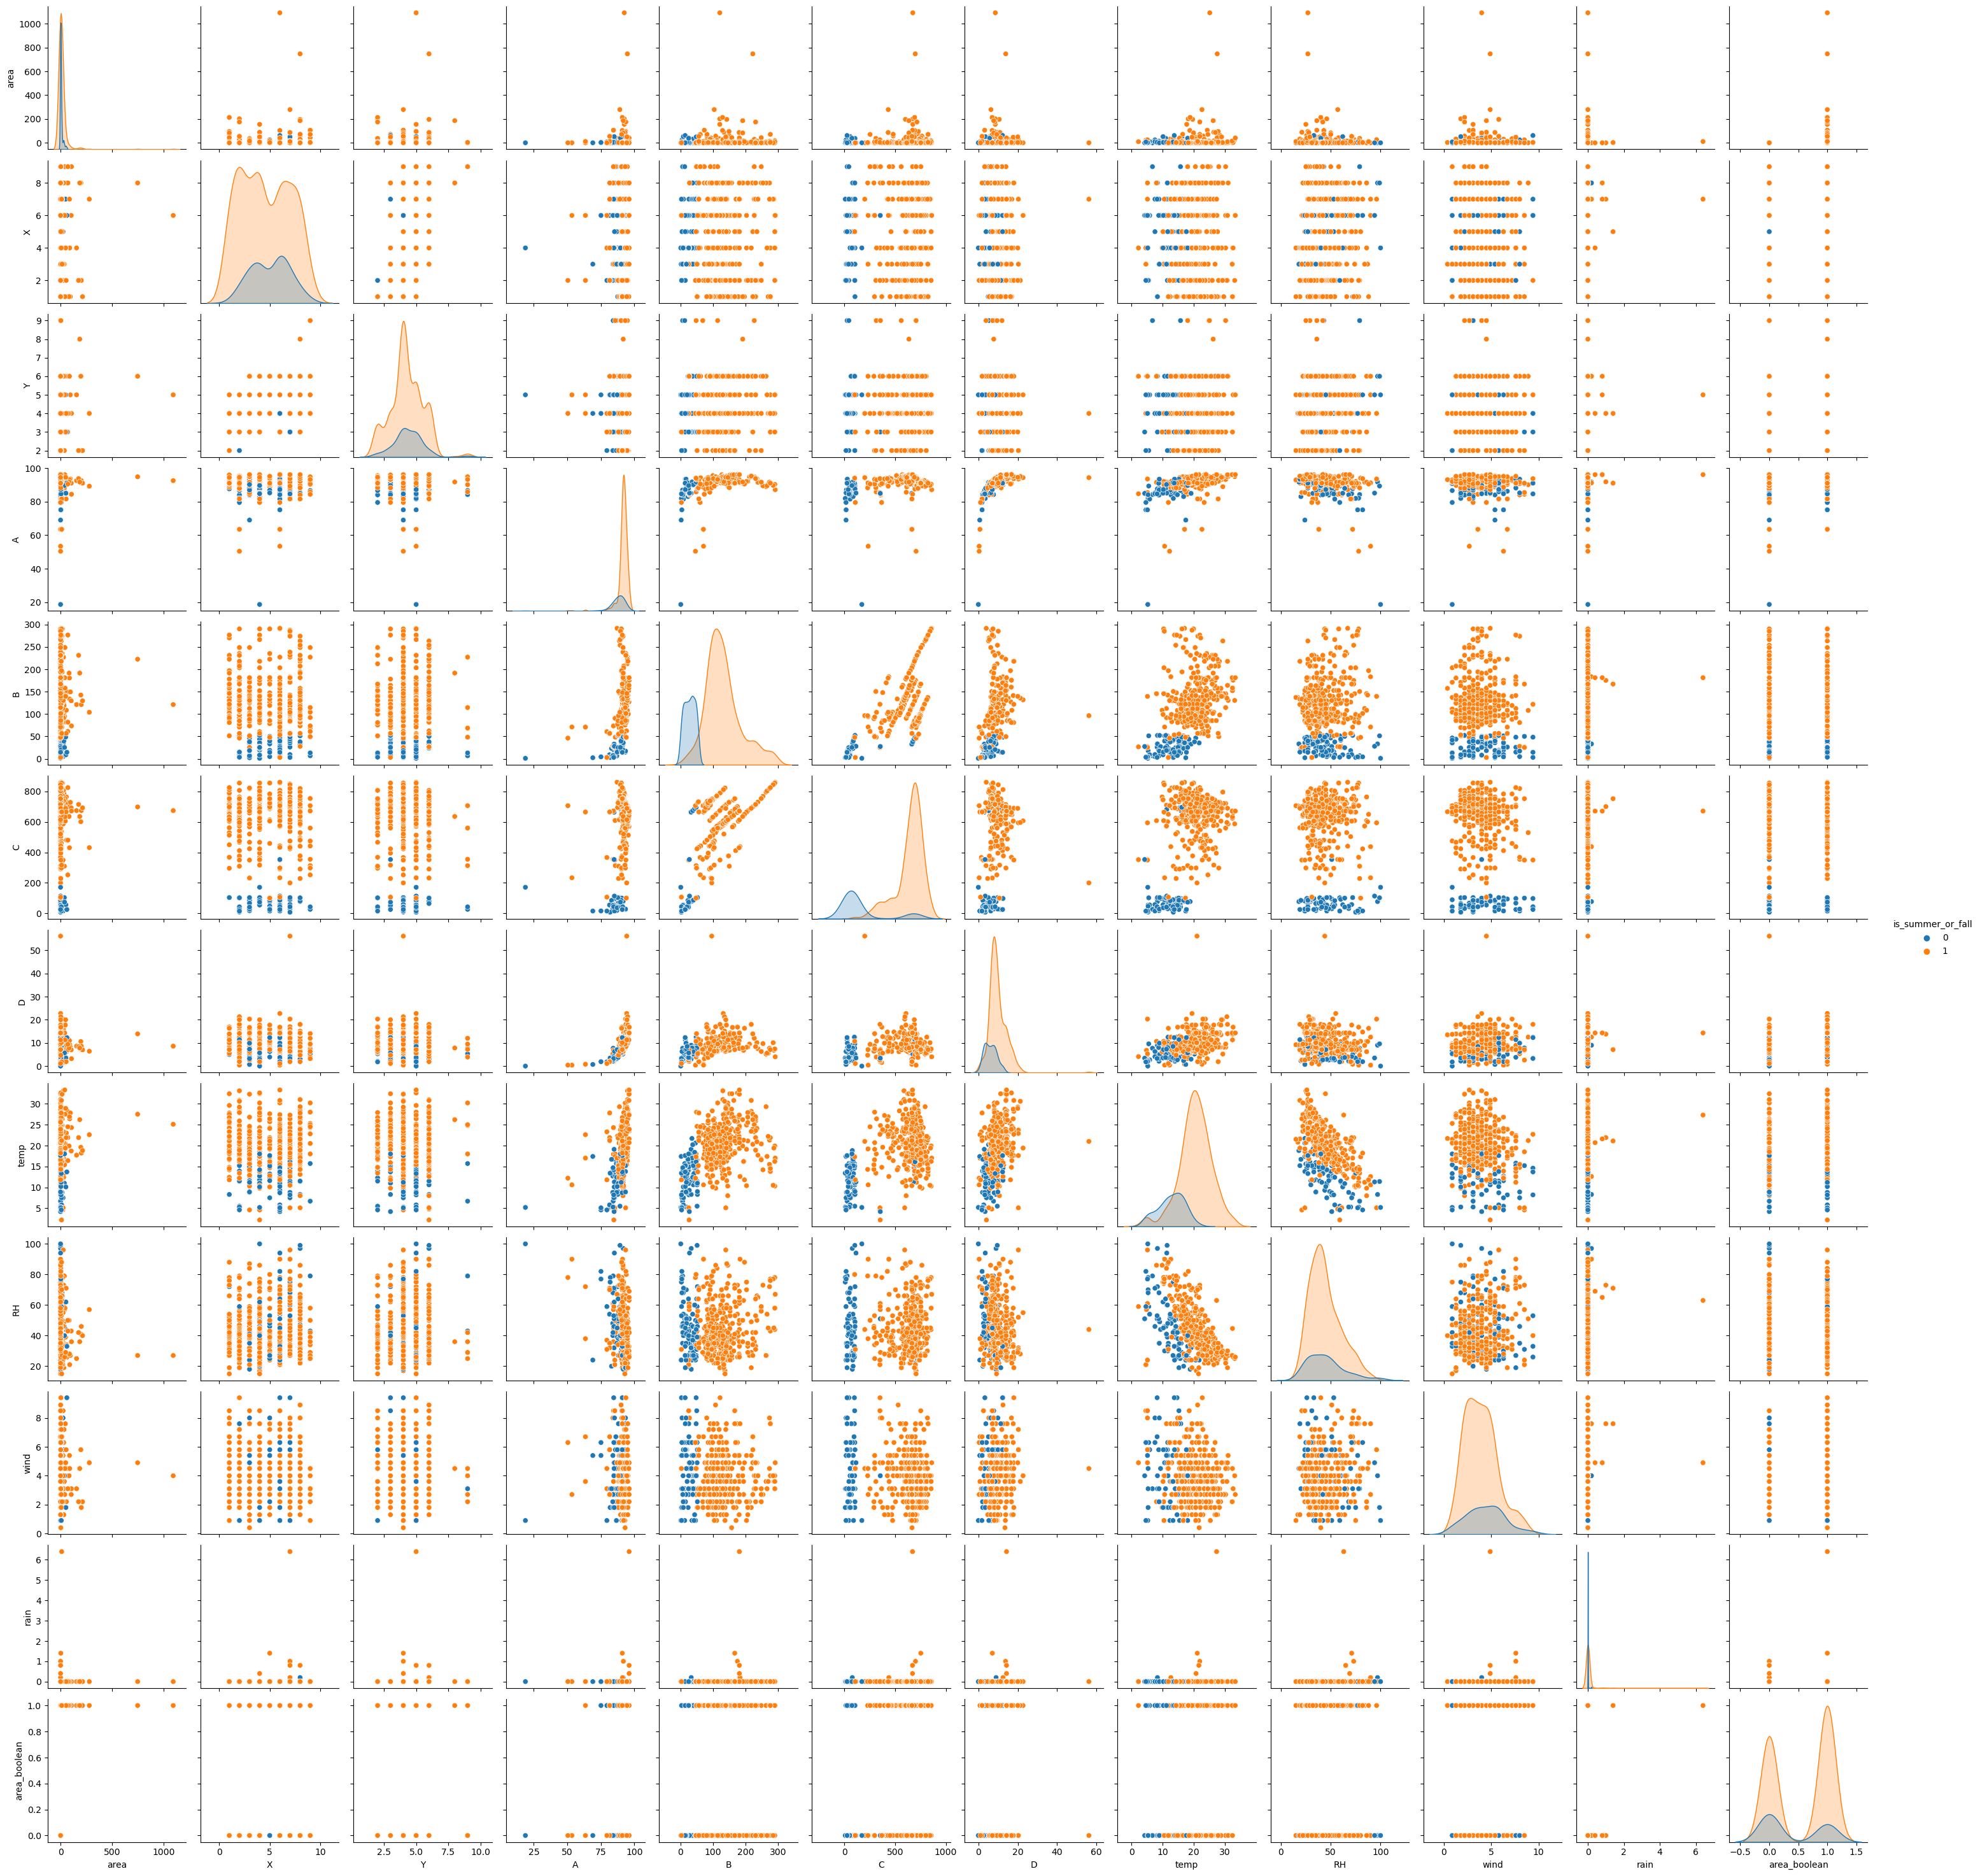

In [31]:
sns.pairplot(df,hue='is_summer_or_fall')
plt.show()

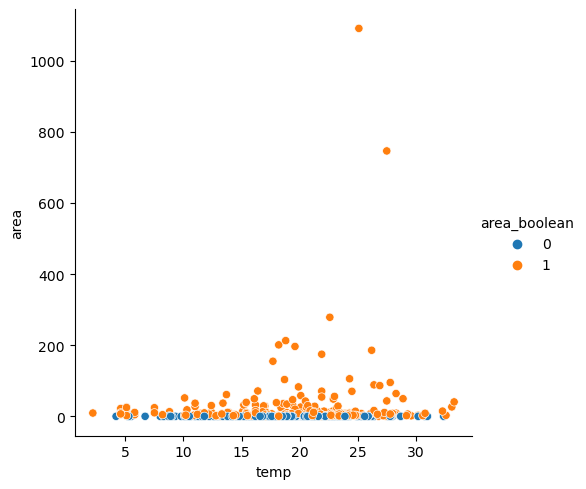

In [32]:
import matplotlib.pyplot as plt

sns.relplot(data=df, x='temp', y='area', hue='area_boolean')

In [33]:
df = df[(df['area'] >= 0.0) & (df['area'] <= 400)]

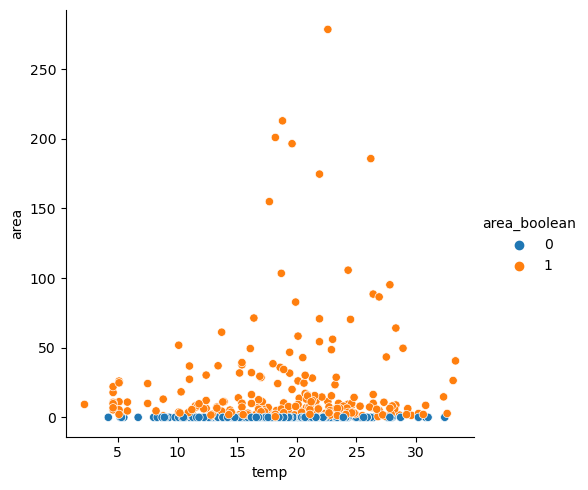

In [34]:
sns.relplot(data=df, x='temp', y='area', hue='area_boolean')

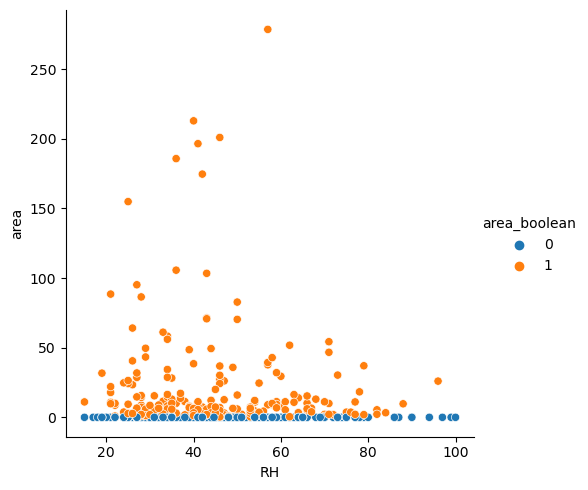

In [35]:
sns.relplot(data=df, x='RH', y='area', hue='area_boolean')

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

Splitting the data

In [37]:
X_binary = df[['C','A','is_summer_or_fall']]
y_binary = df['area_boolean']
X_continuous = df[['temp','RH', 'area_boolean']]
y_continuous = df['area']


In [38]:
X_binary_train, X_binary_test, y_binary_train, y_binary_test = train_test_split(X_binary, y_binary, test_size=0.2)
X_continuous_train, X_continuous_test, y_continuous_train, y_continuous_test = train_test_split(X_continuous, y_continuous, test_size=0.2)


Logistic Regression for binary classification

In [39]:
logreg = LogisticRegression()
logreg.fit(X_binary_train, y_binary_train)
area_boolean_predictions = logreg.predict(X_binary_test)


Calculate roc_curve and roc_auc_score for binary.

In [40]:
from sklearn.metrics import roc_curve, roc_auc_score

In [41]:
fpr, tpr, _ = roc_curve(y_binary_test, area_boolean_predictions)
auroc=roc_auc_score(y_binary_test,area_boolean_predictions)


Multiple Linear Regression for continuous prediction

In [42]:
linreg = LinearRegression()

# Check if area_boolean_predictions is 0
if (area_boolean_predictions == 0).all():
    area_predictions = 0
else:
    # Fit the linear regression model and make predictions
    linreg.fit(X_continuous_train, y_continuous_train)
    area_predictions = linreg.predict(X_continuous_test)

Calculate R2 and RMSE for continuous prediction

In [43]:
r2_continuous = r2_score(y_continuous_test, area_predictions)
rmse_continuous = np.sqrt(mean_squared_error(y_continuous_test, area_predictions))

In [44]:
print("ROC Curve:")
print(f"False Positive Rate: {fpr}")
print(f"True Positive Rate: {tpr}")
print(f"AUC (Area Under the Curve): {auroc:.2f}")

print(f"R-squared (R2) for continuous prediction: {r2_continuous:.2f}")
print(f"Root Mean Squared Error (RMSE) for continuous prediction: {rmse_continuous:.2f}")

ROC Curve:
False Positive Rate: [0.         0.72727273 1.        ]
True Positive Rate: [0.         0.84782609 1.        ]
AUC (Area Under the Curve): 0.56
R-squared (R2) for continuous prediction: 0.08
Root Mean Squared Error (RMSE) for continuous prediction: 22.30


In [45]:
X_binary_2 = df[['A', 'C','is_summer_or_fall']]
y_binary_2 = df['area_boolean']
X_continuous_2 = df[['temp','RH', 'B', 'area_boolean']]
y_continuous_2 = df['area']

In [46]:
X_binary_train, X_binary_test, y_binary_train, y_binary_test = train_test_split(X_binary_2, y_binary_2, test_size=0.2)
X_continuous_train, X_continuous_test, y_continuous_train, y_continuous_test = train_test_split(X_continuous_2, y_continuous_2, test_size=0.2)

In [47]:
logreg_2 = LogisticRegression()
logreg_2.fit(X_binary_train, y_binary_train)
area_boolean_predictions_2 = logreg_2.predict(X_binary_test)

In [48]:
from sklearn.metrics import roc_curve, roc_auc_score

In [49]:
fpr, tpr, _ = roc_curve(y_binary_test, area_boolean_predictions)
auroc=roc_auc_score(y_binary_test,area_boolean_predictions)


In [53]:
linreg_2 = LinearRegression()

# Check if all elements in area_boolean_predictions are 0
if (area_boolean_predictions_2 == 0).all():
    area_predictions_2 = 0
else:
    # Fit the linear regression model and make predictions
    linreg_2.fit(X_continuous_train, y_continuous_train)
    area_predictions_2 = linreg_2.predict(X_continuous_test)

In [54]:
r2_continuous = r2_score(y_continuous_test, area_predictions)
rmse_continuous = np.sqrt(mean_squared_error(y_continuous_test, area_predictions))

In [55]:
print("ROC Curve:")
print(f"False Positive Rate: {fpr}")
print(f"True Positive Rate: {tpr}")
print(f"AUC (Area Under the Curve): {auroc:.2f}")

print(f"R-squared (R2) for continuous prediction: {r2_continuous:.2f}")
print(f"Root Mean Squared Error (RMSE) for continuous prediction: {rmse_continuous:.2f}")

ROC Curve:
False Positive Rate: [0.         0.74074074 1.        ]
True Positive Rate: [0.         0.82978723 1.        ]
AUC (Area Under the Curve): 0.54
R-squared (R2) for continuous prediction: -0.11
Root Mean Squared Error (RMSE) for continuous prediction: 27.46
